# Predicting a Categorical Variable Using Multiple Models
## C0941168 - Yorbis Daniel Alarcon
### AML 3104

#### Data Preprocessing

In [11]:
###EDA###

# Libraries to apply EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data files
train_df = pd.read_csv(r'C:\Users\yorbi\OneDrive - Lambton College\Term 3\Neural Networks and Deep Learning - AML\Assignments\2\DB\train.csv')
test_df = pd.read_csv(r'C:\Users\yorbi\OneDrive - Lambton College\Term 3\Neural Networks and Deep Learning - AML\Assignments\2\DB\test.csv')

# Shape
print("Train DB: Rows and Columns:", train_df.shape)
print("Test DB: Rows and Columns:", test_df.shape)

# Head
train_df.head()

Train DB: Rows and Columns: (215, 15)
Test DB: Rows and Columns: (43, 3)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [13]:
# Checking missing values
train_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [14]:
# Data types
train_df.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

status
Placed        148
Not Placed     67
Name: count, dtype: int64


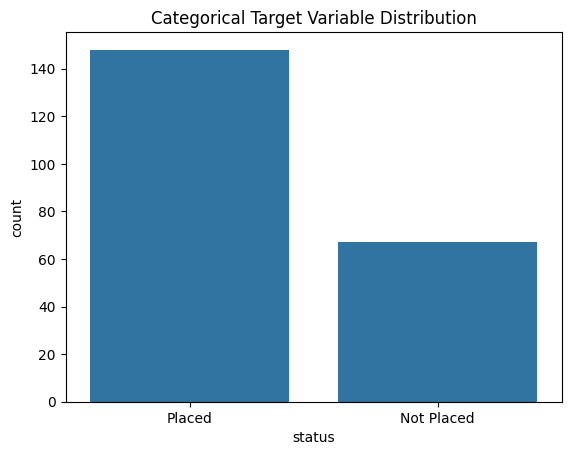

In [20]:
# Target variable
target_column = 'status'

print(train_df[target_column].value_counts())

sns.countplot(x=target_column, data=train_df)
plt.title('Categorical Target Variable Distribution')
plt.show()

In [21]:
### Handle Missing Values ###

train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

C:\Users\yorbi\AppData\Local\Temp\ipykernel_44252\975380333.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method='ffill', inplace=True)
C:\Users\yorbi\AppData\Local\Temp\ipykernel_44252\975380333.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df.fillna(method='ffill', inplace=True)


In [27]:
### Encoding Categorical Features ###

from sklearn.preprocessing import LabelEncoder

# Encode columns
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove in case target was already encoded
if target_column in categorical_columns:
    categorical_columns.remove(target_column)

le = LabelEncoder()
for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])

# Encode target variable
target_le = LabelEncoder()
train_df[target_column] = target_le.fit_transform(train_df[target_column])

In [28]:
### Data split into Training and Test sets ###

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = train_df.drop(columns=[target_column])
y = train_df[target_column]

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### Model Training

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize
log_reg = LogisticRegression(max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Train
log_reg.fit(X_train_scaled, y_train)
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluation functioon
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='weighted')
    rec = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    print(f"\n----- {model_name} -----")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_le.classes_)
    disp.plot(cmap='Greens')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return acc, prec, rec, f1



----- Logistic Regresion -----
Accuracy: 0.7538
Precision: 0.7433
Recall: 0.7538
F1 Score: 0.7454


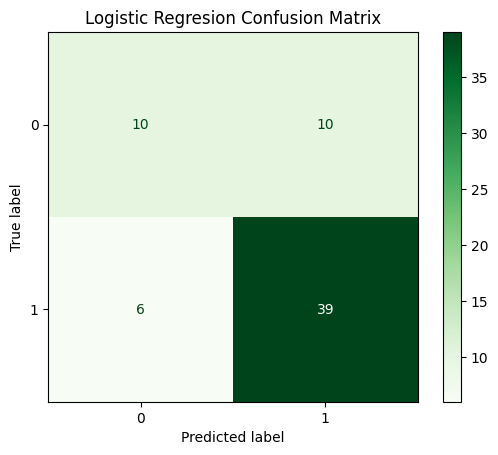


----- Decision Tree -----
Accuracy: 0.7385
Precision: 0.7246
Recall: 0.7385
F1 Score: 0.7267


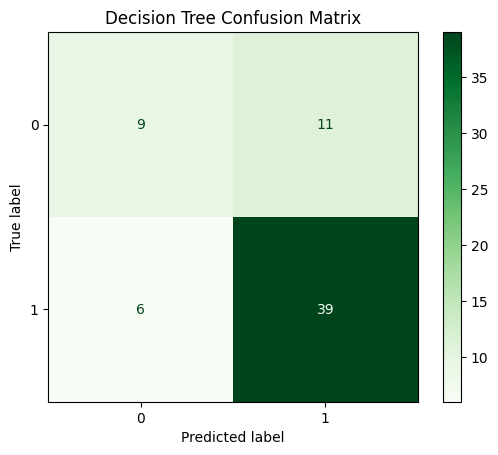


----- Random Forest -----
Accuracy: 0.8462
Precision: 0.8474
Recall: 0.8462
F1 Score: 0.8374


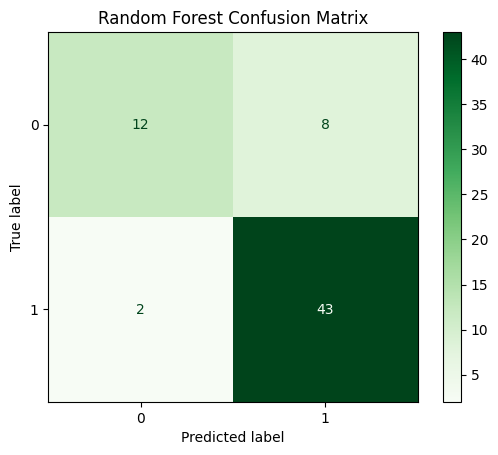

In [40]:
# Evaluate models
metrics = {}

metrics['Logistic Regresion'] = evaluate_model(log_reg, X_val_scaled, y_val, 'Logistic Regresion')
metrics['Decision Tree'] = evaluate_model(tree_clf, X_val, y_val, 'Decision Tree')
metrics['Random Forest'] = evaluate_model(rf_clf, X_val, y_val, 'Random Forest')


### Voting Classifier


----- Voting Classifier -----
Accuracy: 0.8308
Precision: 0.8277
Recall: 0.8308
F1 Score: 0.8231


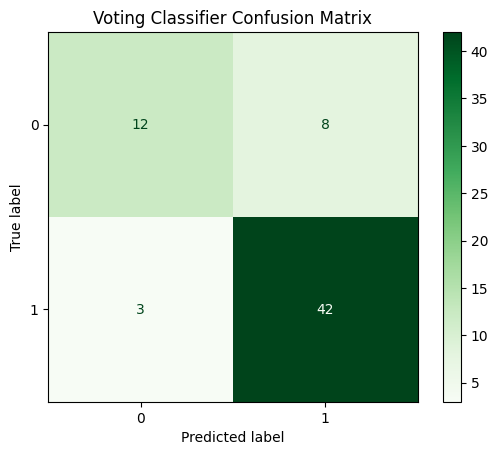

In [45]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('dt', tree_clf),
    ('rf', rf_clf)
], voting='hard')

voting_clf.fit(X_train_scaled, y_train)

# Evaluation
metrics['Voting Classifier'] = evaluate_model(voting_clf, X_val_scaled, y_val, 'Voting Classifier')
